To implement [KD-Tree algorithm](https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/kdtrees.pdf) in Python as a demo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([(30,40), (5,25), (10,12), (70,70), (50,30), (35,45)])
# data = np.array([(3, 6), (17, 15), (13, 15), (6, 12), (9, 1), (2, 7), (10, 19)])

In [3]:
def init_tree(node):
    node = tuple(node)
    return {
        node: [{}, {}]
    }

In [4]:
def insert(node, axis, G):
    D = len(node)
    axis %= D
    
    node = tuple(node)
    
    ref_node = list(G.keys())[0] # there should be just one key
    if node[axis] < ref_node[axis]:
        branch = G[ref_node][0]
    else:
        branch = G[ref_node][1]

    if branch == {}:
        branch[node] = [{}, {}]
    else:
        insert(node, axis + 1, branch)
    return G

In [5]:
def build_kd_tree(data):
    D = data.shape[1]
    for k, node in enumerate(data):
        if k == 0:
            graph = init_tree(node)
            print(graph)
            continue

        axis = k % D
        insert(node, axis, graph)
    return graph

In [6]:
def extract_axis(graph, current_axis):
    """needs rewritten to work together with plotting 
    so as to know where x/y lim at each level"""
    if graph != {}:
        node = list(graph.keys())[0]
        yield (node, current_axis)
        
        D = len(node)
        next_axis = (current_axis + 1) % D
        for sub_graph in graph[node]:
            for i in extract_axis(sub_graph, next_axis):
                yield i

In [7]:
graph = build_kd_tree(data)

{(30, 40): [{}, {}]}


(0, 100)

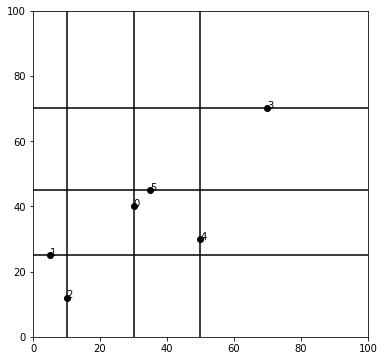

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
for k, i in enumerate(extract_axis(graph, 0)):
    node, axis = i
    if axis == 0:
        ax.plot([node[axis], node[axis]], [-100, 100], color='black')
    elif axis == 1:
        ax.plot([-100, 100], [node[axis], node[axis]], color='black')
    ax.scatter([node[0]], [node[1]], color='black')
    ax.text(*node, k)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)